# Visualización del Impacto del Apagón de Internet en Bangladesh

Este notebook analiza visualmente el impacto del apagón de internet en Bangladesh (17-24 de julio de 2024) en la actividad de desarrolladores de software usando datos de GitHub. Compararemos la actividad de programadores en Bangladesh con países de control (India y Filipinas) que no experimentaron interrupciones.

## 1. Configuración e Importación


In [1]:
%matplotlib inline
from IPython.display import Image, display
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from collections import defaultdict
import datetime as dt
import matplotlib.dates as mdates

sys.path.append(os.path.abspath('../src/template'))

from main import (
    load_and_process_data,
    calculate_weekly_data,
    plot_daily_activity,
    plot_weekly_activity,
    plot_daily_raw_activity,
    plot_percentage_change
)

## 2. Configuración del entorno


In [2]:
countries = ["Bangladesh", "India", "Philippines"]
highlight_start = "2024-07-17"
highlight_end = "2024-07-24"
highlight_week_start = "2024-W29" 
highlight_week_end = "2024-W30"   
output_dir = "../output"
data_dir = "../data"

os.makedirs(output_dir, exist_ok=True)
sin_sombra_dir = os.path.join(output_dir, "sin_sombreado")
os.makedirs(sin_sombra_dir, exist_ok=True)

In [3]:
def load_country_data(country_name):
    """Carga los datos de un país desde el directorio data"""
    file_path = os.path.join(data_dir, f"{country_name}_data.json")
    print(f"Cargando datos desde: {file_path}")
    return load_and_process_data(file_path)

In [4]:
def calculate_country_weekly_data(country_name):
    """Calcula datos semanales para un país desde el directorio data"""
    file_path = os.path.join(data_dir, f"{country_name}_data.json")
    print(f"Calculando datos semanales desde: {file_path}")
    return calculate_weekly_data(file_path)

In [5]:
def show_plots(files, directory=output_dir):
    """Muestra múltiples gráficos en el notebook"""
    for file in files:
        filepath = os.path.join(directory, file)
        try:
            display(Image(filename=filepath))
            print(f"Mostrando: {filepath}")
        except FileNotFoundError:
            print(f"No se encontró el archivo: {filepath}")

## 3. Verificación de datos disponibles

In [6]:
for country in countries:
    file_path = os.path.join(data_dir, f"{country}_data.json")
    if os.path.exists(file_path):
        print(f"✓ Archivo encontrado: {file_path}")
    else:
        print(f"✗ Archivo NO encontrado: {file_path}")

✓ Archivo encontrado: ../data\Bangladesh_data.json
✓ Archivo encontrado: ../data\India_data.json
✓ Archivo encontrado: ../data\Philippines_data.json


In [7]:
try:
    bd_data = load_country_data("Bangladesh")
    print("\nDatos de Bangladesh cargados correctamente.")
    print(f"Período de tiempo: {bd_data['fechas'][0]} hasta {bd_data['fechas'][-1]}")
    print(f"Número de días: {len(bd_data['fechas'])}")
except Exception as e:
    print(f"Error al cargar datos: {e}")

Cargando datos desde: ../data\Bangladesh_data.json

Datos de Bangladesh cargados correctamente.
Período de tiempo: 2024-05-01 00:00:00 hasta 2024-10-31 00:00:00
Número de días: 184


## 4. Visualización de datos crudos diarios

Estos gráficos muestran los datos diarios sin promediar, lo que permite ver las fluctuaciones diarias reales en la actividad.

In [8]:
print("Generando gráficas de datos crudos...")
plot_daily_raw_activity(
    countries=countries,
    highlight_start=highlight_start,
    highlight_end=highlight_end,
    output_dir=output_dir
)

Generando gráficas de datos crudos...
Figura guardada como: ../output\Bangladesh_commits_raw.png
Figura guardada como: ../output\India_commits_raw.png
Figura guardada como: ../output\Philippines_commits_raw.png
Figura comparativa guardada como: ../output\comparacion_commits_raw.png


Mostrando gráficas de datos crudos (Bangladesh):


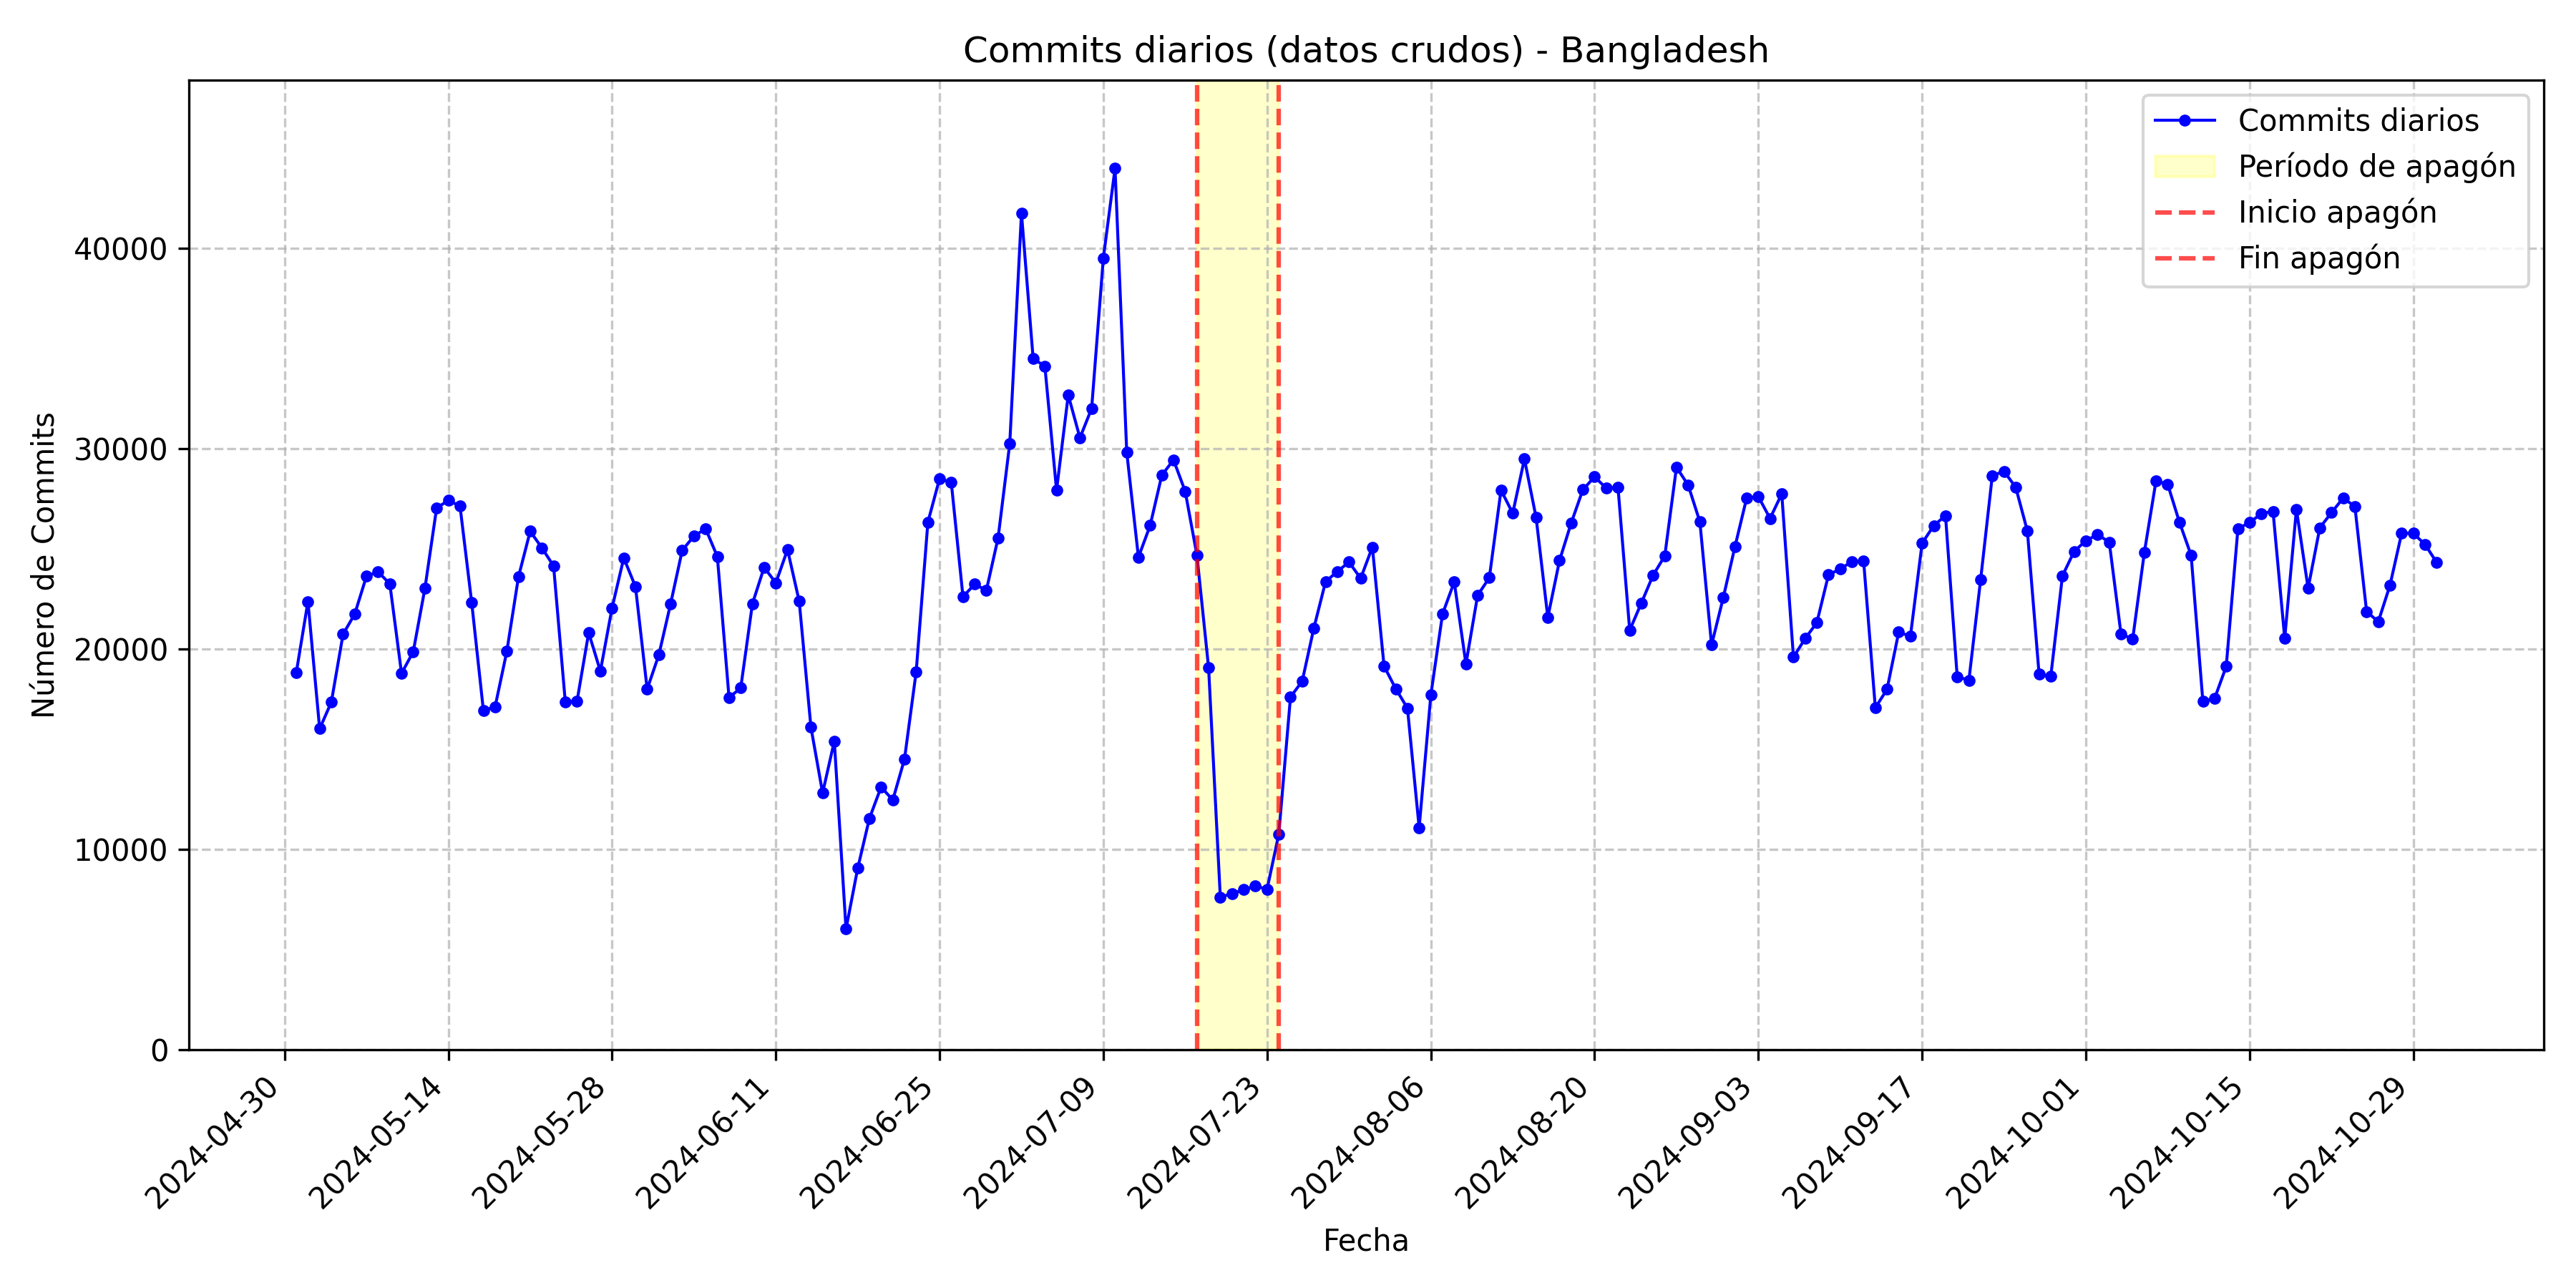

In [9]:
print("Mostrando gráficas de datos crudos (Bangladesh):")
display(Image(filename=os.path.join(output_dir, "Bangladesh_commits_raw.png")))

## 5. Visualización con promedios móviles de 7 dias

Estos gráficos aplican un promedio móvil de 7 días para suavizar las fluctuaciones diarias y mostrar tendencias más claras.

In [10]:
print("Generando gráficas...")
plot_daily_activity(
    countries=countries,
    highlight_start=highlight_start,
    highlight_end=highlight_end,
    window_size=7,
    output_dir=sin_sombra_dir,
    show_highlight=False
)

Generando gráficas...
Figura guardada como: ../output\sin_sombreado\Bangladesh_commits_diarios.png
Figura guardada como: ../output\sin_sombreado\India_commits_diarios.png
Figura guardada como: ../output\sin_sombreado\Philippines_commits_diarios.png
Figura comparativa guardada como: ../output\sin_sombreado\comparacion_commits_diarios.png


Mostrando gráficas (Bangladesh):


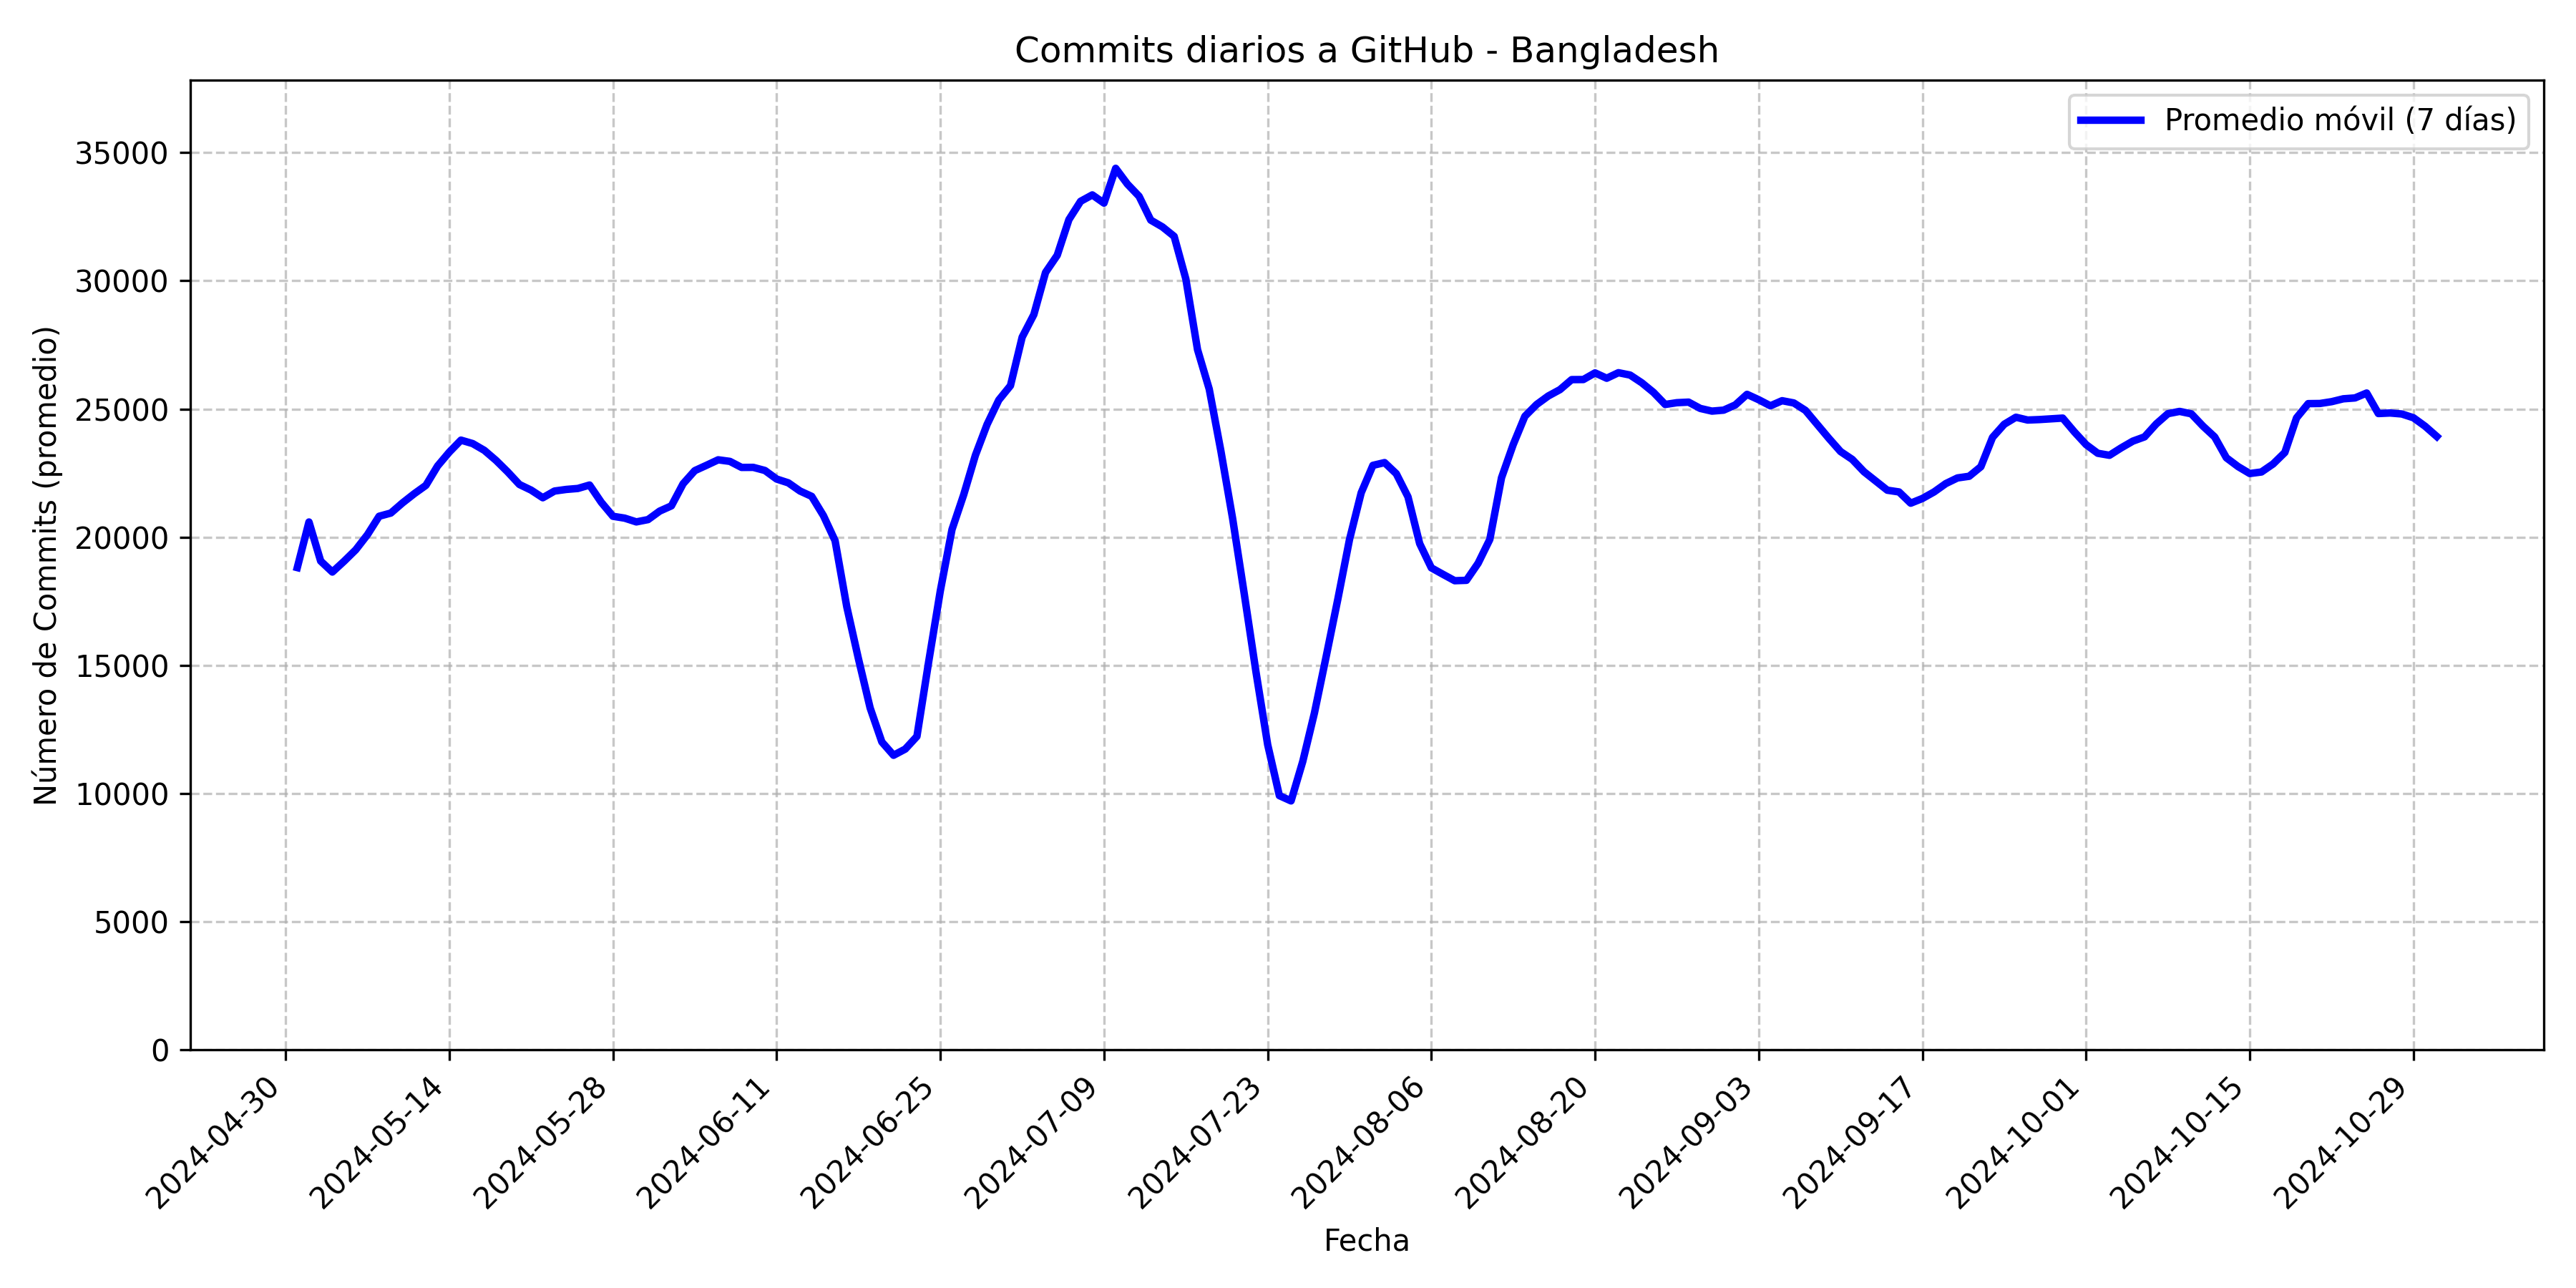

In [11]:
print("Mostrando gráficas (Bangladesh):")
display(Image(filename=os.path.join(sin_sombra_dir, "Bangladesh_commits_diarios.png")))

Mostrando comparación entre países:


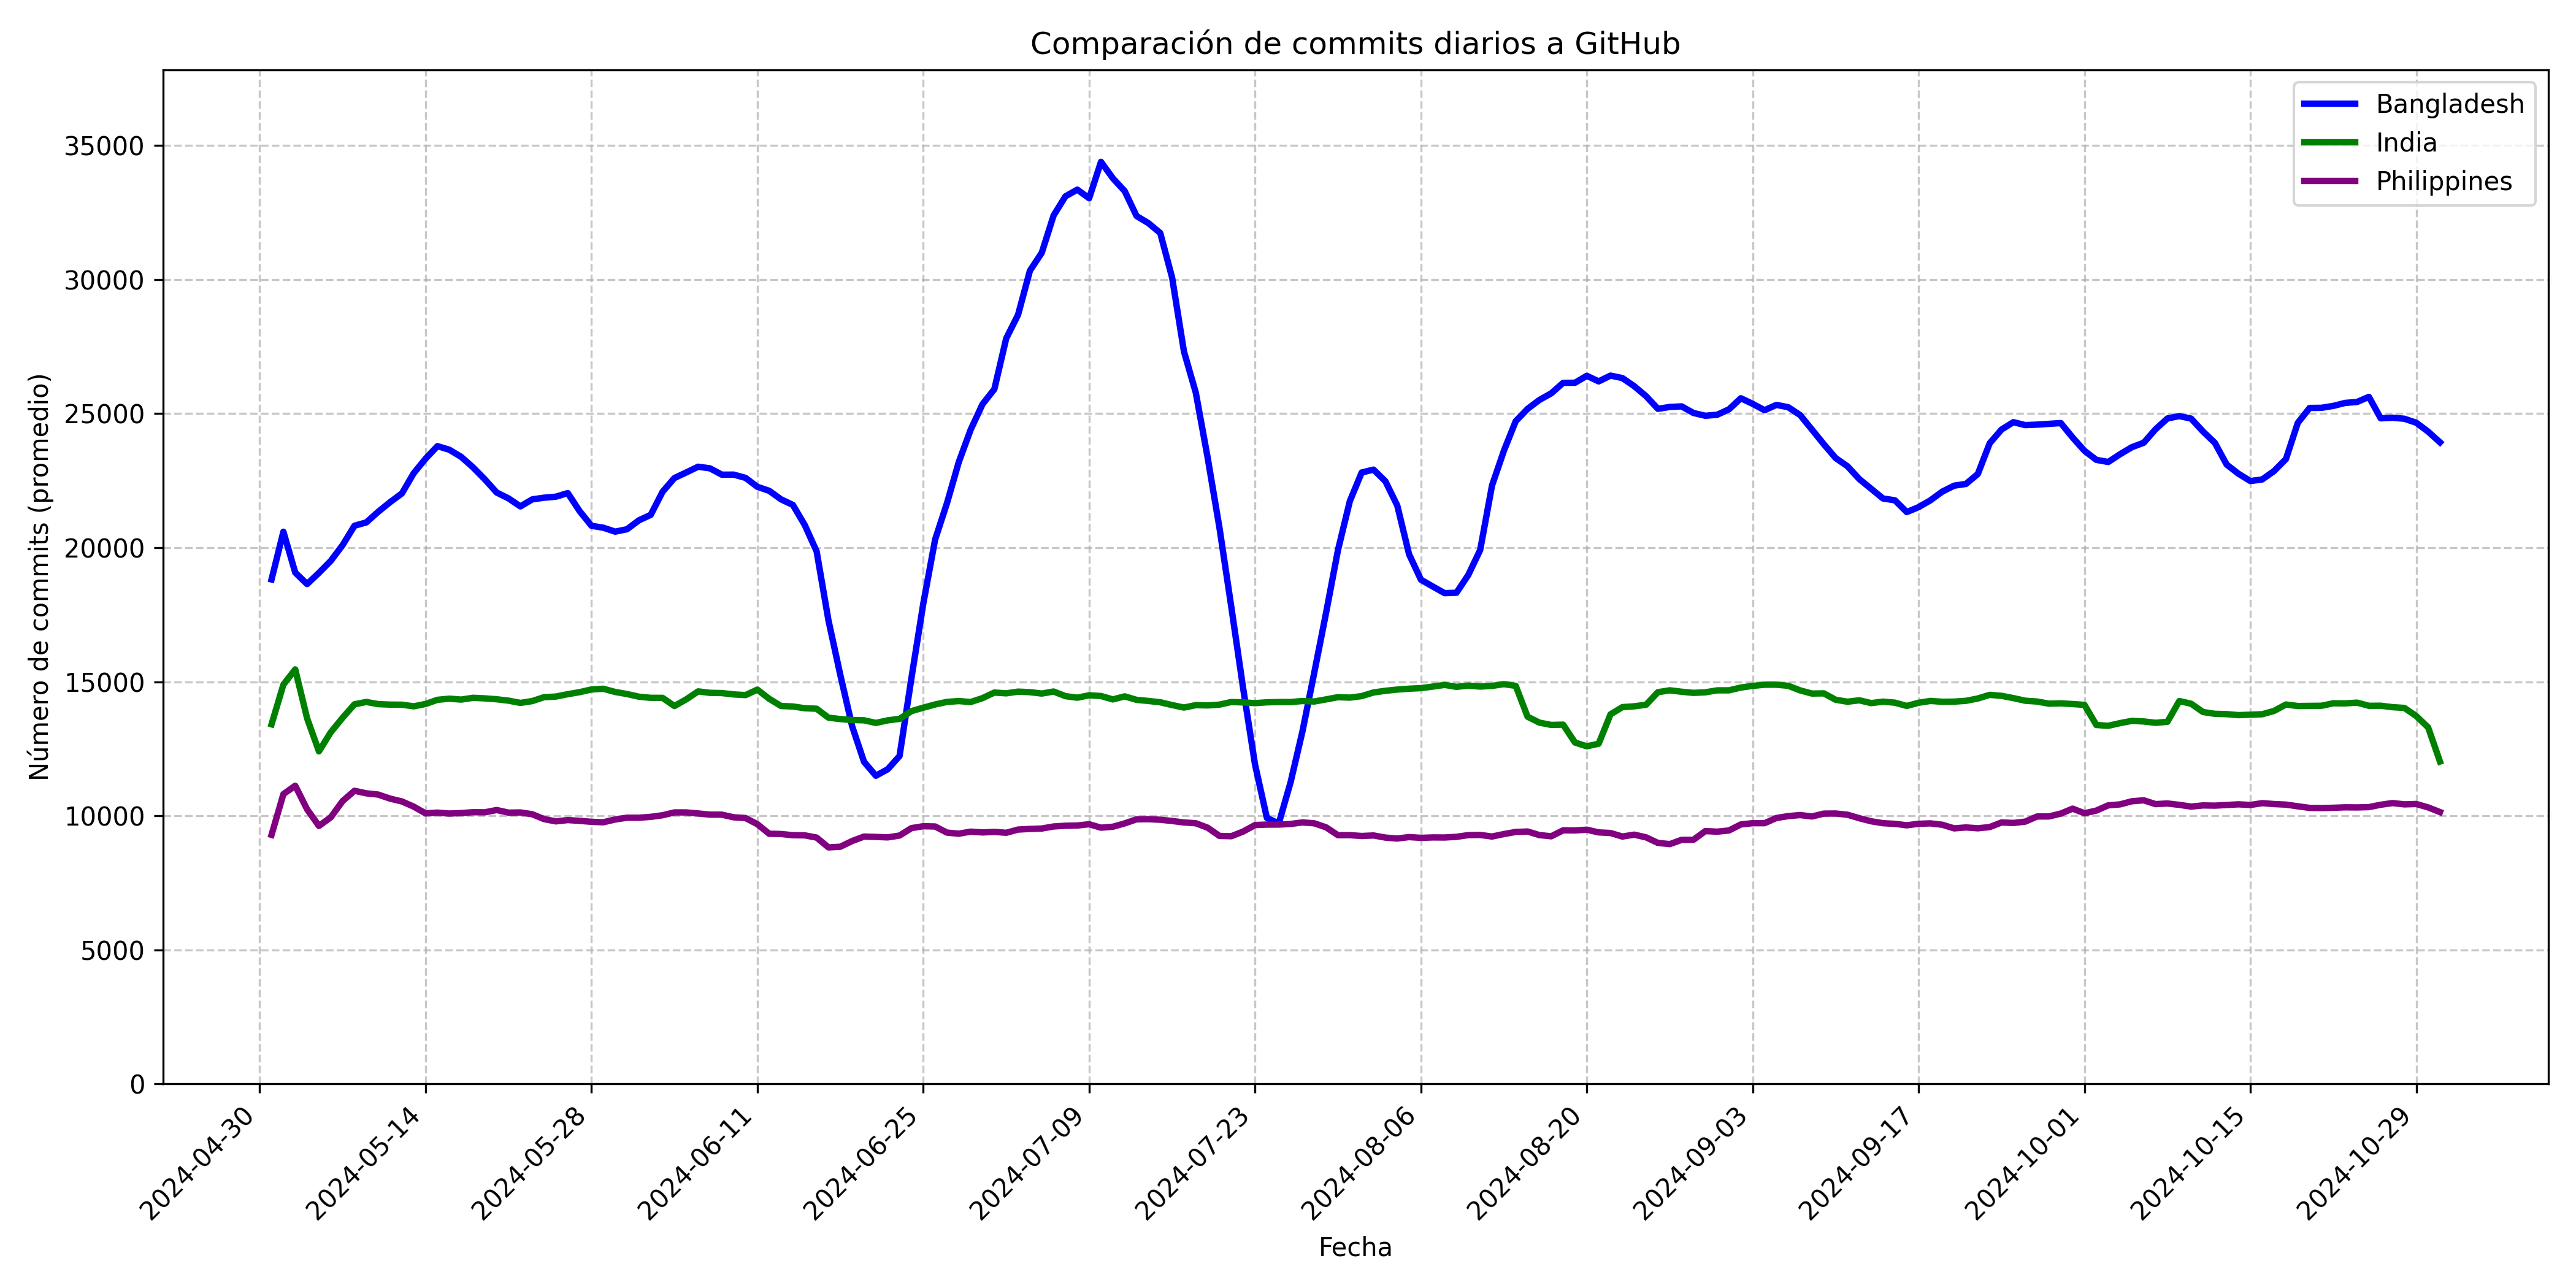

In [12]:
print("Mostrando comparación entre países:")
display(Image(filename=os.path.join(sin_sombra_dir, "comparacion_commits_diarios.png")))

## 7. Visualización de cambios porcentuales

Estos gráficos muestran los cambios porcentuales día a día, lo que permite identificar claramente cuándo ocurrieron los mayores cambios en la actividad.

In [13]:
print("Generando gráficas de cambio porcentual...")
plot_percentage_change(
    countries=countries,
    highlight_start=highlight_start,
    highlight_end=highlight_end,
    window_size=7,
    output_dir=output_dir
)

Generando gráficas de cambio porcentual...
Figura guardada como: ../output\Bangladesh_cambio_porcentual.png
Figura guardada como: ../output\India_cambio_porcentual.png
Figura guardada como: ../output\Philippines_cambio_porcentual.png
Figura comparativa guardada como: ../output\comparacion_cambio_porcentual.png


Mostrando gráficas de cambio porcentual (Bangladesh):


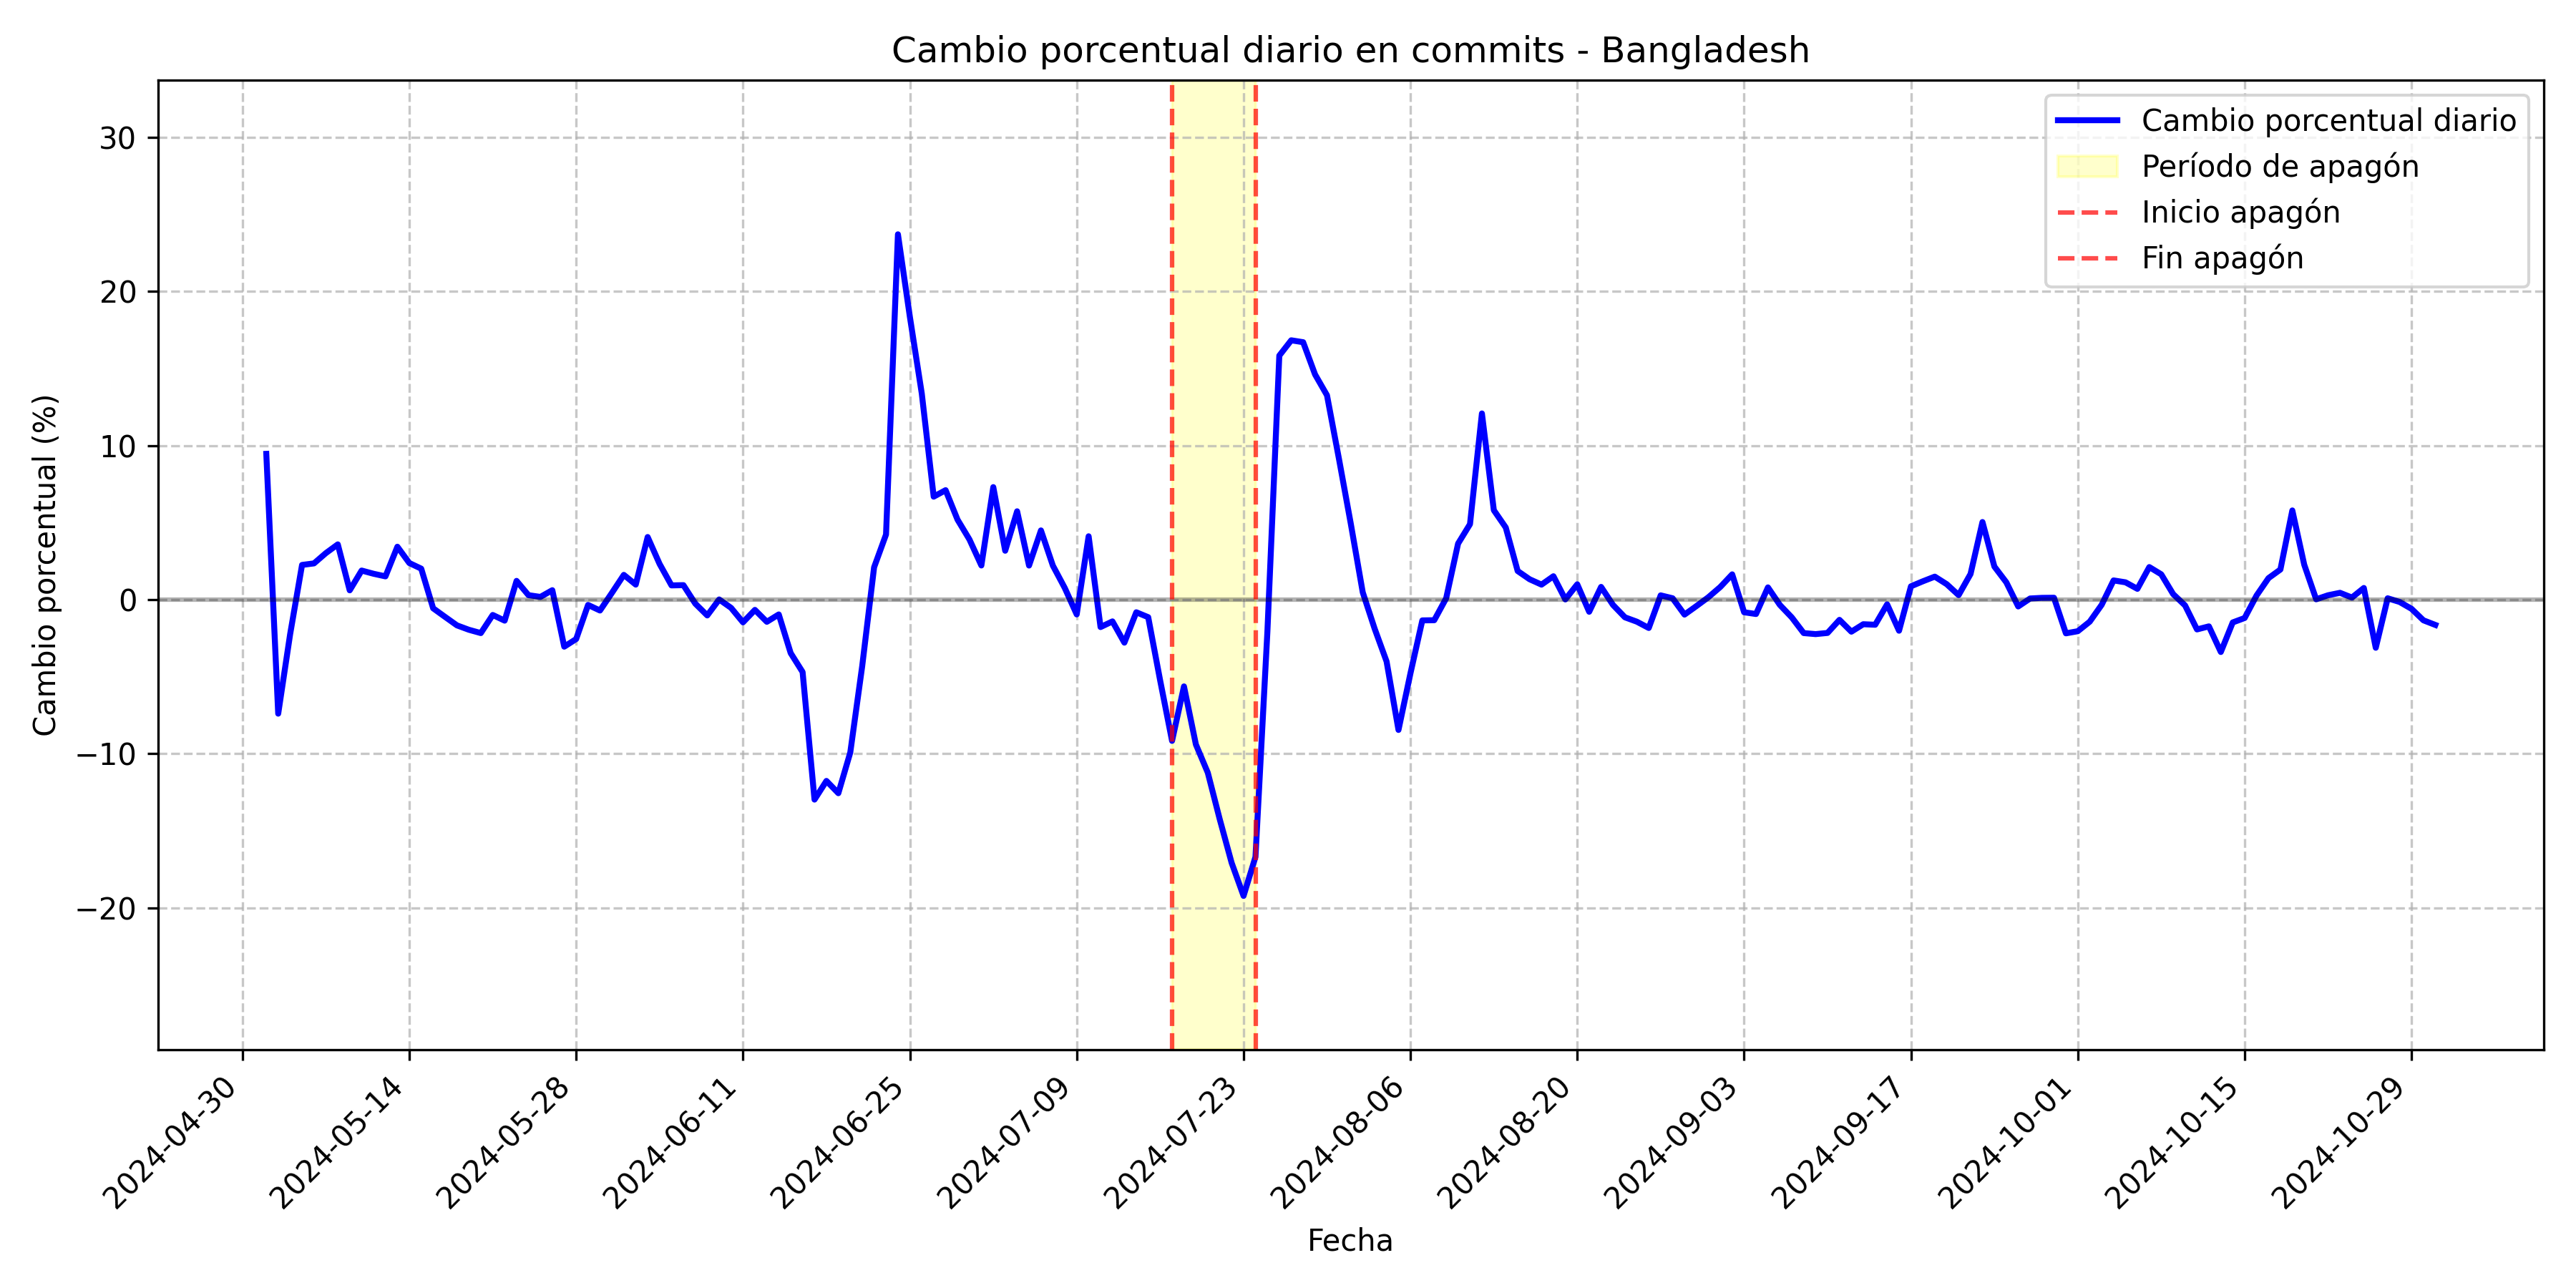

In [14]:
print("Mostrando gráficas de cambio porcentual (Bangladesh):")
display(Image(filename=os.path.join(output_dir, "Bangladesh_cambio_porcentual.png")))

Mostrando comparación de cambio porcentual entre países:


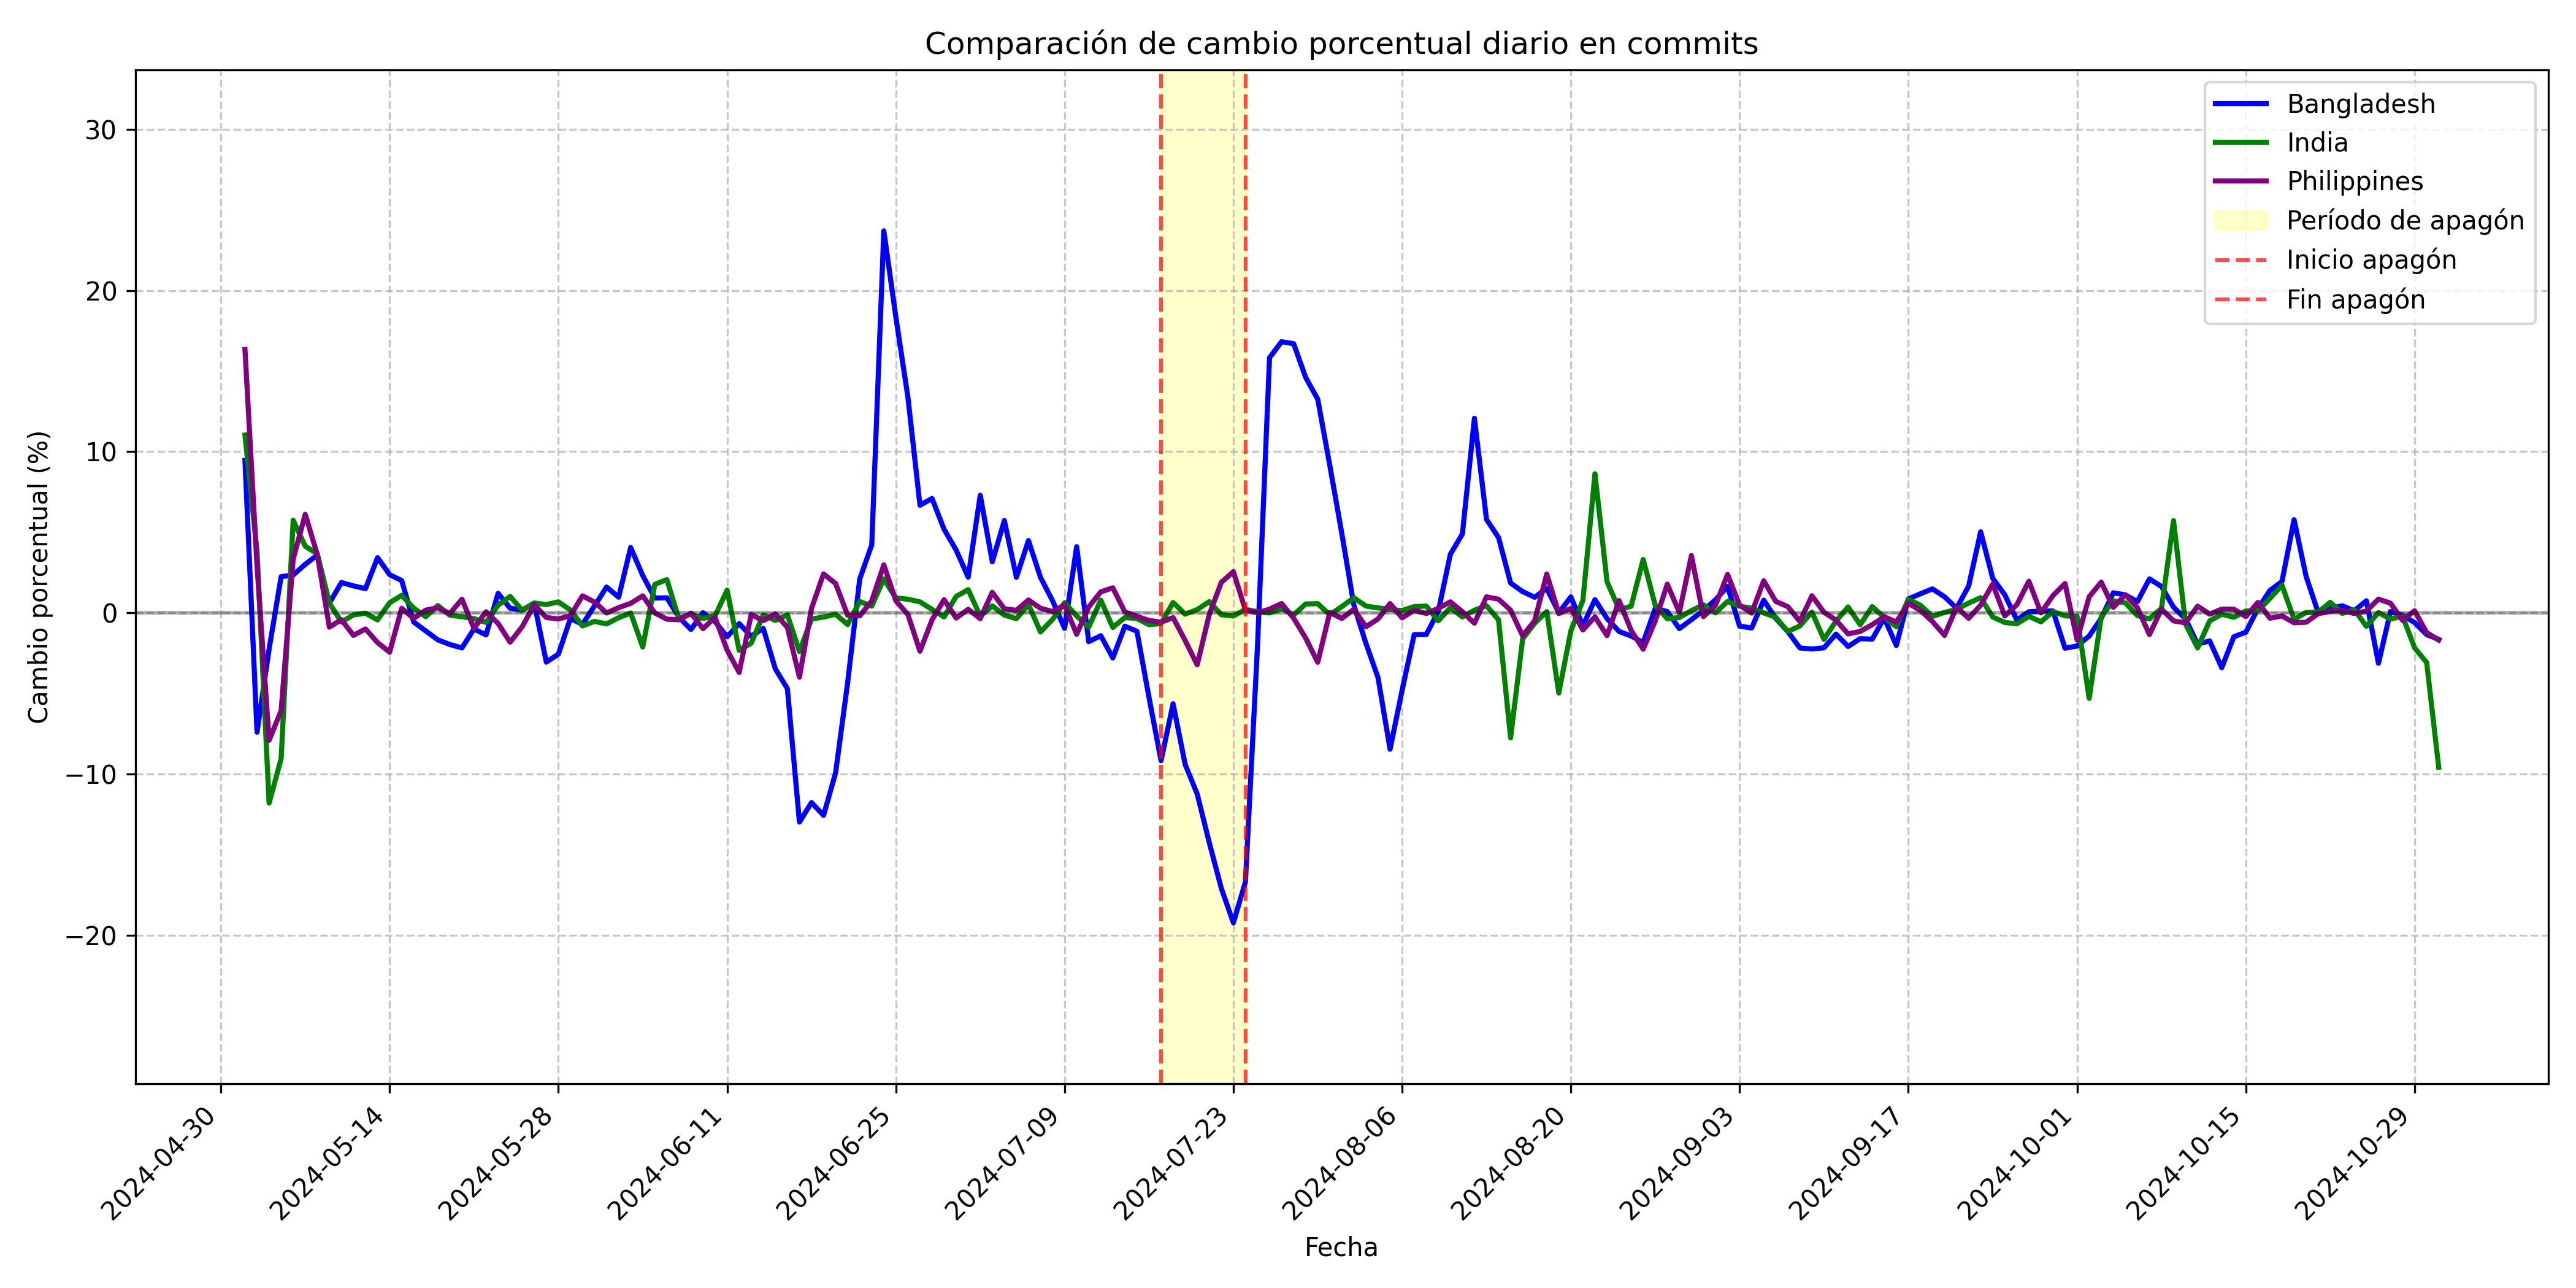

In [15]:
print("Mostrando comparación de cambio porcentual entre países:")
display(Image(filename=os.path.join(output_dir, "comparacion_cambio_porcentual.png")))